generate 2 separate coord system with 5 points eaach

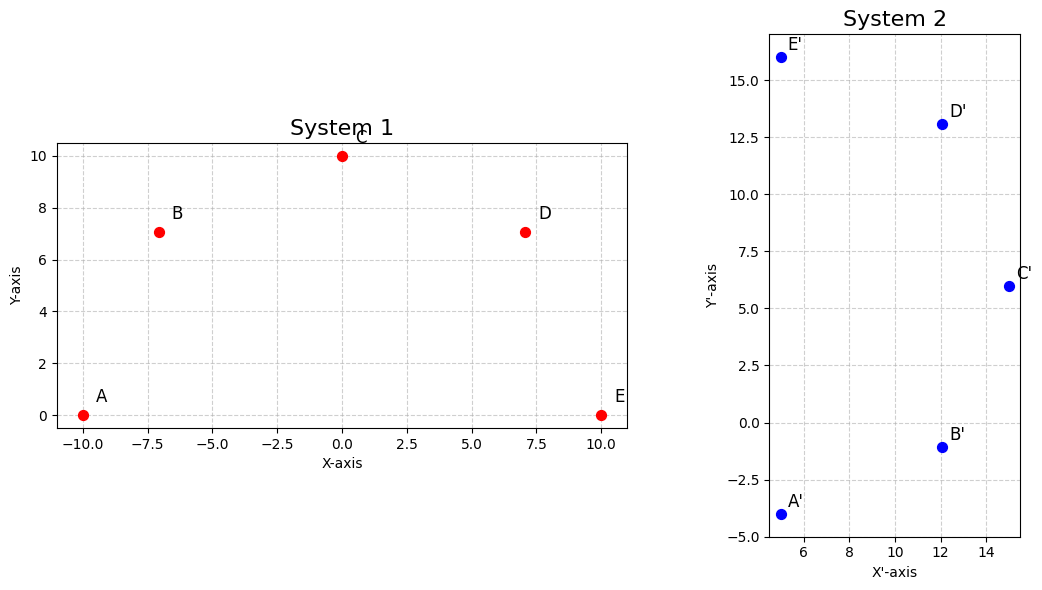

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# --- Step 1: Define Points and Visualize ---

# Set print options for matrix output later
np.set_printoptions(precision=2, suppress=True)

# System 1 Coordinates and Labels (Radius 10)
points1 = np.array([
    [-10.00, 0.00],
    [-7.07, 7.07],
    [0.00, 10.00],
    [7.07, 7.07],
    [10.00, 0.00]
])
labels1 = ['A', 'B', 'C', 'D', 'E']

# System 2 Coordinates and Labels (UPDATED to Radius 10)
# These points form a semi-circle of radius 10, centered at (5, 6)
points2 = np.array([
    [5.00, -4.00],
    [12.07, -1.07],
    [15.00, 6.00],
    [12.07, 13.07],
    [5.00, 16.00]
])
labels2 = ["A'", "B'", "C'", "D'", "E'"]

# Create the Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for System 1
ax1.scatter(points1[:, 0], points1[:, 1], color='red', s=50, zorder=5)
ax1.set_title("System 1", fontsize=16)
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.set_aspect('equal', adjustable='box')
for i, label in enumerate(labels1):
    ax1.text(points1[i, 0] + 0.5, points1[i, 1] + 0.5, label, fontsize=12)

# Plot for System 2
ax2.scatter(points2[:, 0], points2[:, 1], color='blue', s=50, zorder=5)
ax2.set_title("System 2", fontsize=16)
ax2.set_xlabel("X'-axis")
ax2.set_ylabel("Y'-axis")
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_aspect('equal', adjustable='box')
for i, label in enumerate(labels2):
    ax2.text(points2[i, 0] + 0.3, points2[i, 1] + 0.3, label, fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

generate matrices

In [8]:
def create_matrices_for_system(points_array, labels):
    """
    Calculates distance/angle matrices. (No changes in calculation logic)
    """
    matrices = {}
    for i, ref_label in enumerate(labels):
        ref_point = points_array[i]
        other_labels, distances, angles = [], [], []
        
        for j, other_label in enumerate(labels):
            if i == j: continue
            other_point = points_array[j]
            vector = other_point - ref_point
            distance = np.linalg.norm(vector)
            angle = np.degrees(np.arctan2(vector[1], vector[0]))
            distances.append(distance)
            angles.append(angle)
            other_labels.append(other_label)
        
        matrix = np.array([distances, angles])
        matrices[f"f({ref_label})"] = (matrix, other_labels)
        
    return matrices

def print_formatted_matrices(system_name, matrices_dict):
    """
    Prints the matrices in the new vertical (Angle, Distance) format.
    """
    print(f"--- {system_name} ---")
    for name, (matrix, other_labels) in matrices_dict.items():
        print(f"\n{name} = [ (Angle, Distance) ]")
        
        # The stored matrix is [[distances], [angles]]
        # We will iterate through its columns to print pairs
        for i in range(matrix.shape[1]):
            distance = matrix[0, i]
            angle = matrix[1, i]
            target_label = other_labels[i]
            
            # Print each pair on a new line, formatted as (Angle, Distance)
            print(f"  To {target_label.ljust(3)}: ({angle:8.2f}°, {distance:8.2f})")
    print("\n" + "="*40)


# --- Main execution of Step 2 ---
matrices1 = create_matrices_for_system(points1, labels1)
print_formatted_matrices("System 1 Matrices", matrices1)

matrices2 = create_matrices_for_system(points2, labels2)
print_formatted_matrices("System 2 Matrices", matrices2)

--- System 1 Matrices ---

f(A) = [ (Angle, Distance) ]
  To B  : (   67.49°,     7.65)
  To C  : (   45.00°,    14.14)
  To D  : (   22.50°,    18.48)
  To E  : (    0.00°,    20.00)

f(B) = [ (Angle, Distance) ]
  To A  : ( -112.51°,     7.65)
  To C  : (   22.51°,     7.65)
  To D  : (    0.00°,    14.14)
  To E  : (  -22.50°,    18.48)

f(C) = [ (Angle, Distance) ]
  To A  : ( -135.00°,    14.14)
  To B  : ( -157.49°,     7.65)
  To D  : (  -22.51°,     7.65)
  To E  : (  -45.00°,    14.14)

f(D) = [ (Angle, Distance) ]
  To A  : ( -157.50°,    18.48)
  To B  : (  180.00°,    14.14)
  To C  : (  157.49°,     7.65)
  To E  : (  -67.49°,     7.65)

f(E) = [ (Angle, Distance) ]
  To A  : (  180.00°,    20.00)
  To B  : (  157.50°,    18.48)
  To C  : (  135.00°,    14.14)
  To D  : (  112.51°,     7.65)

--- System 2 Matrices ---

f(A') = [ (Angle, Distance) ]
  To B' : (   22.51°,     7.65)
  To C' : (   45.00°,    14.14)
  To D' : (   67.50°,    18.48)
  To E' : (   90.00°,    20.00

fingerprinting using internal angles to match the end points A and E

In [14]:

def get_fingerprints(points_array, labels):
    """Calculates the geometric fingerprint for every point in a system."""
    fingerprints = {}
    for i, ref_label in enumerate(labels):
        ref_point = points_array[i]
        
        neighbors = []
        for j, other_label in enumerate(labels):
            if i == j: continue
            
            other_point = points_array[j]
            vector = other_point - ref_point
            
            distance = np.linalg.norm(vector)
            angle = np.degrees(np.arctan2(vector[1], vector[0]))
            
            neighbors.append({'dist': distance, 'angle': angle})
            
        # FIX APPLIED HERE: Sort by distance first, then by angle as a tie-breaker.
        neighbors.sort(key=lambda p: (p['dist'], p['angle']))
        
        fingerprints[ref_label] = neighbors
    return fingerprints


def find_correspondences(fingerprints1, fingerprints2):
    """Compares fingerprints to find matching pairs between two systems."""
    
    print("## Finding Point Correspondences...")
    print("-" * 35)
    
    pairs = []
    unmatched2 = list(fingerprints2.keys())

    for label1, sig1 in fingerprints1.items():
        
        dists1 = np.array([p['dist'] for p in sig1])
        angles1 = np.array([p['angle'] for p in sig1])
        internal_angles1 = np.diff(angles1)

        match_found = False
        for label2 in unmatched2:
            sig2 = fingerprints2[label2]
            
            dists2 = np.array([p['dist'] for p in sig2])
            angles2 = np.array([p['angle'] for p in sig2])
            internal_angles2 = np.diff(angles2)
            
            if np.allclose(dists1, dists2):
                
                is_identical = np.allclose(internal_angles1, internal_angles2)
                is_negative = np.allclose(internal_angles1, -internal_angles2)
                
                if is_identical or is_negative:
                    match_type = "Reflection" if is_negative else "Rigid"
                    print(f"✅ Match Found: {label1} corresponds to {label2} ({match_type} pattern)")
                    pairs.append((label1, label2))
                    unmatched2.remove(label2)
                    match_found = True
                    break
        
        if not match_found:
            print(f"❌ No match found for {label1}")

    return pairs


# --- Step 3: Run the Pairing Algorithm ---

fingerprints1 = get_fingerprints(points1, labels1)
fingerprints2 = get_fingerprints(points2, labels2)

found_pairs = find_correspondences(fingerprints1, fingerprints2)

print("-" * 35)
print("\n## Final Paired Sets:")
print(found_pairs)

## Finding Point Correspondences...
-----------------------------------
✅ Match Found: A corresponds to A' (Reflection pattern)
❌ No match found for B
❌ No match found for C
❌ No match found for D
✅ Match Found: E corresponds to E' (Reflection pattern)
-----------------------------------

## Final Paired Sets:
[('A', "A'"), ('E', "E'")]


fingerprinting using just angles for each vertex (triangel perimeter)

In [16]:
# Create dictionaries for easy lookup of points by their labels
point_map1 = {label: point for label, point in zip(labels1, points1)}
point_map2 = {label: point for label, point in zip(labels2, points2)}

def get_robust_fingerprints(labels, point_map):
    """
    Calculates a robust fingerprint for each point based on the perimeters of
    triangles formed with its neighbors. This signature is invariant to
    rotation and reflection.
    """
    fingerprints = {}
    
    for ref_label in labels:
        ref_point = point_map[ref_label]
        neighbor_labels = [l for l in labels if l != ref_label]
        
        perimeters = []
        # Create all unique pairs of neighbors to form triangles
        for n1_label, n2_label in combinations(neighbor_labels, 2):
            p1 = point_map[n1_label]
            p2 = point_map[n2_label]
            
            # Calculate the 3 side lengths of the triangle:
            # (ref -> p1), (ref -> p2), (p1 -> p2)
            d1 = np.linalg.norm(ref_point - p1)
            d2 = np.linalg.norm(ref_point - p2)
            d3 = np.linalg.norm(p1 - p2)
            
            perimeters.append(d1 + d2 + d3)
        
        # The final signature is the sorted list of perimeters
        fingerprints[ref_label] = sorted(perimeters)
        
    return fingerprints


def find_correspondences(fingerprints1, fingerprints2):
    """Compares the robust fingerprints to find matching pairs."""
    
    print("## Finding Point Correspondences...")
    print("-" * 35)
    
    pairs = []
    unmatched2 = list(fingerprints2.keys())

    for label1, sig1 in fingerprints1.items():
        match_found = False
        for label2 in unmatched2:
            sig2 = fingerprints2[label2]
            
            # The check is now a simple and robust comparison of the two perimeter lists
            if np.allclose(sig1, sig2):
                print(f"✅ Match Found: {label1} corresponds to {label2}")
                pairs.append((label1, label2))
                unmatched2.remove(label2)
                match_found = True
                break
        
        if not match_found:
            print(f"❌ No match found for {label1}")

    return pairs


# --- Step 3: Run the Pairing Algorithm ---

# Calculate the robust fingerprints for each system
fingerprints1 = get_robust_fingerprints(labels1, point_map1)
fingerprints2 = get_robust_fingerprints(labels2, point_map2)

# Find and print the correspondences
found_pairs = find_correspondences(fingerprints1, fingerprints2)

print("-" * 35)
print("\n## Final Paired Sets:")
print(found_pairs)

## Finding Point Correspondences...
-----------------------------------
✅ Match Found: A corresponds to A'
✅ Match Found: B corresponds to B'
✅ Match Found: C corresponds to C'
✅ Match Found: D corresponds to D'
✅ Match Found: E corresponds to E'
-----------------------------------

## Final Paired Sets:
[('A', "A'"), ('B', "B'"), ('C', "C'"), ('D', "D'"), ('E', "E'")]
